This tutorial is Part 1 of an introduction to social network analysis in Python. It covers how to structure network data, as well as how to use NetworkX to: construct graphs, explore their features, and implement simple algorithms. 
The primary example used for replication is Zachary's (1977) paper on divisions within a collegiate karate club. The paper is available [here](https://www.jstor.org/stable/pdf/3629752.pdf) and is the source of all tables/figures included below. We use the built-in dataset available from NetworkX, supplemented with a parsed and cleaned version of the weights provided [here](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#zachary). 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Working-with-network-data" data-toc-modified-id="Working-with-network-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Working with network data</a></span><ul class="toc-item"><li><span><a href="#Structuring-network-data" data-toc-modified-id="Structuring-network-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Structuring network data</a></span><ul class="toc-item"><li><span><a href="#(Optional)-Subway-example" data-toc-modified-id="(Optional)-Subway-example-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>(Optional) Subway example</a></span></li></ul></li><li><span><a href="#Types-of-network-datasets" data-toc-modified-id="Types-of-network-datasets-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Types of network datasets</a></span></li><li><span><a href="#Storing-network-data" data-toc-modified-id="Storing-network-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Storing network data</a></span></li></ul></li><li><span><a href="#Preparing-network-data-with-NetworkX" data-toc-modified-id="Preparing-network-data-with-NetworkX-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparing network data with NetworkX</a></span><ul class="toc-item"><li><span><a href="#Building-a-graph-from-scratch" data-toc-modified-id="Building-a-graph-from-scratch-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Building a graph from scratch</a></span><ul class="toc-item"><li><span><a href="#Initializing-a-graph" data-toc-modified-id="Initializing-a-graph-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Initializing a graph</a></span></li><li><span><a href="#Adding-nodes" data-toc-modified-id="Adding-nodes-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Adding nodes</a></span></li><li><span><a href="#Adding-edges" data-toc-modified-id="Adding-edges-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Adding edges</a></span></li></ul></li><li><span><a href="#Building-a-graph-from-an-edgelist" data-toc-modified-id="Building-a-graph-from-an-edgelist-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Building a graph from an edgelist</a></span></li><li><span><a href="#Building-special-graph-types" data-toc-modified-id="Building-special-graph-types-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Building special graph types</a></span><ul class="toc-item"><li><span><a href="#Weighted-graphs" data-toc-modified-id="Weighted-graphs-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Weighted graphs</a></span></li><li><span><a href="#Directed-graphs" data-toc-modified-id="Directed-graphs-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Directed graphs</a></span></li></ul></li><li><span><a href="#Importing-built-in-graphs" data-toc-modified-id="Importing-built-in-graphs-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Importing built-in graphs</a></span></li></ul></li><li><span><a href="#Analyzing-network-data" data-toc-modified-id="Analyzing-network-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyzing network data</a></span><ul class="toc-item"><li><span><a href="#Inspecting-graphs" data-toc-modified-id="Inspecting-graphs-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Inspecting graphs</a></span><ul class="toc-item"><li><span><a href="#Graph-size" data-toc-modified-id="Graph-size-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Graph size</a></span></li><li><span><a href="#Node-data" data-toc-modified-id="Node-data-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Node data</a></span></li><li><span><a href="#Edge-data" data-toc-modified-id="Edge-data-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Edge data</a></span></li></ul></li><li><span><a href="#Local-structure" data-toc-modified-id="Local-structure-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Local structure</a></span><ul class="toc-item"><li><span><a href="#Exploring-neighbors" data-toc-modified-id="Exploring-neighbors-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Exploring neighbors</a></span></li><li><span><a href="#Exploring-degree" data-toc-modified-id="Exploring-degree-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Exploring degree</a></span></li><li><span><a href="#Local-bridges" data-toc-modified-id="Local-bridges-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Local bridges</a></span></li><li><span><a href="#Connected-components" data-toc-modified-id="Connected-components-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Connected components</a></span></li></ul></li><li><span><a href="#Algorithms" data-toc-modified-id="Algorithms-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Algorithms</a></span><ul class="toc-item"><li><span><a href="#Shortest-path" data-toc-modified-id="Shortest-path-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Shortest path</a></span></li><li><span><a href="#Max-flow-/-min-cut" data-toc-modified-id="Max-flow-/-min-cut-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Max flow / min cut</a></span><ul class="toc-item"><li><span><a href="#Find-the-minimum-cut" data-toc-modified-id="Find-the-minimum-cut-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>Find the minimum cut</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Exporting-NetworkX-graphs-to-other-data-structures" data-toc-modified-id="Exporting-NetworkX-graphs-to-other-data-structures-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exporting NetworkX graphs to other data structures</a></span><ul class="toc-item"><li><span><a href="#As-edgelist" data-toc-modified-id="As-edgelist-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>As edgelist</a></span></li><li><span><a href="#As-dictionary" data-toc-modified-id="As-dictionary-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>As dictionary</a></span></li><li><span><a href="#As-adjacency-matrix" data-toc-modified-id="As-adjacency-matrix-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>As adjacency matrix</a></span></li></ul></li><li><span><a href="#Wrap-up" data-toc-modified-id="Wrap-up-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Wrap-up</a></span><ul class="toc-item"><li><span><a href="#Plots" data-toc-modified-id="Plots-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Plots</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

Let's get started! First, we need to import all of the packages we'll use to do our analysis.

In [ ]:
import pandas as pd               # For analyzing tabular data
import numpy as np                # For working with arrays and numerical operations
import networkx as nx             # For network data specifically
import matplotlib.pyplot as plt   # For making plots
from pyvis import network as pv   # For making interactive plots
import pprint                     # For making output easier to read

%matplotlib inline                          
pd.set_option('display.max_columns', None)  # For preventing horizontal shortening of tables when displayed
print(nx.__version__)                       # Confirm that we have the latest networkx version

# Working with network data

## Structuring network data

The first challenge you'll face is figuring out how to structure your network data:
- What entities will form the **nodes** or **vertices**?
- What will define the **edges** or **links**? 

In some cases the answer may seem obvious. For example, we are used to thinking about friendship networks, in which the nodes are people, and the edges are personal connections. In other cases, the natural representation is less clear.


<div class="alert alert-success">
<b>Example:</b>
Consider the Spotify dataset. 

- Are nodes: songs, albums, artists, playlists, genres, or listeners? 
- What should the links between these entities be? 

There are many different possible ways to structure this data. The right answer will depend on the question you're asking.
</div>

### (Optional) Subway example

 For example, consider the NYC subway. An intuitive representation might have subway stops as nodes, and subway lines as edges:
<img src="figures/degree.png" style="width: 500px;"/>

However, we could also build a network of lines connected by transfers:
<img src="figures/c_space.png" style="width: 500px;"/>

Or a bi-partite network in which nodes are lines and stations, and edges represent the fact that a line stops at a station:
<img src="figures/b_space.png" style="width: 700px;"/>

## Types of network datasets

Once you have your nodes and edges, recall that there are two helpful dimensions along which networks can be categorized:

1. Whether their edges are **directed** or **undirected** 
2. Whether their edges are **weighted** or **unweighted**

In this tutorial, we will discuss how to store and work with data from these different types of networks.

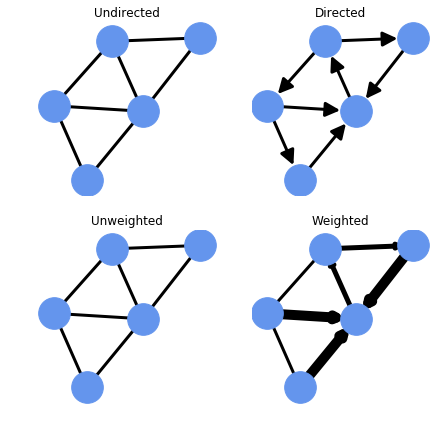

In [2]:
H = nx.DiGraph([('A', 'B'),
                ('A', 'E'),
                ('B', 'C'),
                ('B', 'D'),
                ('C', 'D'),
                ('D', 'A'),
                ('E', 'D')])


fig, ax = plt.subplots(2,2, figsize=[7,7])

pos = nx.kamada_kawai_layout(H)
nx.draw(H, pos=pos, node_color='cornflowerblue', node_size=1000, arrows=False, width=3, ax=ax[0][0])
nx.draw(H, pos=pos, node_color='cornflowerblue', node_size=1000, arrowsize=30, width=3, ax=ax[0][1])
nx.draw(H, pos=pos, node_color='cornflowerblue', node_size=1000, arrows=False, width=3, ax=ax[1][0])
nx.draw(H, pos=pos, node_color='cornflowerblue', node_size=1000, arrows=False, width=3, ax=ax[1][1])

heavy = [('E', 'D'), ('B', 'D'), ('C', 'D')]
medium = [('A', 'E'), ('D', 'A')]

nx.draw_networkx_edges(H, pos=pos, edgelist=heavy, width=10, ax=ax[1][1])
nx.draw_networkx_edges(H, pos=pos, edgelist=medium, width=5, ax=ax[1][1])


ax[0][0].set_title("Undirected")
ax[0][1].set_title("Directed")
ax[1][0].set_title("Unweighted")
ax[1][1].set_title("Weighted")

plt.show()

## Storing network data

One of the first challenges of working with network data is to figure out how to store information about the network structure. There are three common ways to store network structure data:

1. **An edge list** has one row for each edge, containing the origin node and the destination node.
2. **A dictionary** has one key per node, which corresponds to a list of the node's neighbors.
3. **An adjacency matrix** has one entry _per_ possible edge, set to 1 if the edge exists and 0 otherwise.

Consider the following example:

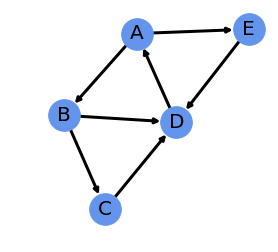

In [3]:
fig, ax = plt.subplots(1,1, figsize=[4,4])
nx.draw_kamada_kawai(H,node_color='cornflowerblue', node_size=1000, arrows=True, 
                     width=3, with_labels=True, font_size=20, ax=ax)

           Edge list:                   Dictionary:               Adjacency matrix:
           __________                   ___________               _________________
           
           A,B                          A: B,E                       A  B  C  D  E  
           A,E                          B: C,D                    A  0  1  0  0  1 
           B,C                          C: D                      B  0  0  1  1  0
           B,D                          D: A                      C  0  0  0  1  0
           C,D                          E: D                      D  1  0  0  0  0
           D,A                                                    E  0  0  0  1  0
           E,D

Observe that the storage requirements for each of these data structures is very different. For example, an adjacency matrix has to store lots of zero entries, so in sparse graphs we might prefer to use edge lists or dictionaries.

<div class="alert alert-success">
<b>Question:</b> How would the adjacency matrix look different if the graph was weighted? If the graph was undirected?

Altogether, we can think of four main pieces of information that we'll need to store: **nodes, edges, node attributes, and edge attributes.**   
Attribute information could be attached to one of the data structures above, or stored in a separate dataset.

- For example, the cells of an adjacency matrix might contain information on weights.
- For example, information about nodes (e.g. demographic characteristics) might be kept in a separate table.



# Preparing network data with NetworkX

Let's start with a simple example using the graph above. This will help us build some intuition on the networkX package.

We will rely on the following commands:
```python
nx.Graph()                    # Initialize a graph
nx.DiGraph()                  # Initialize a directed graph

G.clear()                     # Clear the graph
G.is_empty()                  # Confirm that the graph is empty

G.add_edge()                  # Add/remove single nodes/edges from graph
G.add_node()
G.remove_edge()
G.remove_nodes()

G.add_edges_from([...])       # Add/remove a list of multiple nodes/edges from graph
G.add_nodes_from([...])
G.remove_edges_from([...])
G.remove_nodes_from([...])
```     
     

## Building a graph from scratch

Let's build a simple graph from scratch. For this exercise, let's pretend that we're trying to map which NYU schools allow their students to cross-enroll with another.

### Initializing a graph

In [ ]:
# Let's create an empty graph
G = nx.Graph()

# Sadly, there are no nodes or edges, which we can see if we plot:
nx.draw(G, with_labels=True)

In [ ]:
# As we can confirm, it's empty 
nx.is_empty(G)

### Adding nodes

In [ ]:
# Add a single node ... 
G.add_node('Steinhardt')

nx.draw(G, with_labels=True)

In [ ]:
# ... or  a list of nodes
G.add_nodes_from(['Stern', 'Courant', 'Silver', 
                  'Wagner', 'Tandon'])

nx.draw(G, with_labels=True)

### Adding edges

In [ ]:
# Add a single edge...
G.add_edge('Silver', 'Steinhardt')

nx.draw(G, with_labels=True)

In [ ]:
# ... or a list of edges
G.add_edges_from([ ('Stern' , 'Courant'),
                   ('Tandon', 'Courant'),
                   ('Wagner', 'Silver'),
                   ('Wagner', 'Steinhardt'),
                   ('Wagner', 'Stern'),
                   ('Wagner', 'Tandon') ])

# Let's see if it worked:
nx.draw(G, with_labels=True)

## Building a graph from an edgelist

Alternatively, you can just supply a list of edges to the graph

In [ ]:
H = nx.Graph([     ('Stern' , 'Courant'),
                   ('Tandon', 'Courant'),
                   ('Wagner', 'Silver'),
                   ('Wagner', 'Steinhardt'),
                   ('Wagner', 'Stern'),
                   ('Wagner', 'Tandon'),
                   ('Silver', 'Steinhardt')
               ])

nx.draw(H, with_labels=True)

## Building special graph types

### Weighted graphs

We can specify a weighted graph by including a dictionary with the weight as an attribute.

In [ ]:
H.clear()
H = nx.Graph([     ('Stern' , 'Courant',    {'weight': 5}),
                   ('Tandon', 'Courant',    {'weight': 7}),
                   ('Wagner', 'Silver',     {'weight': 1}),
                   ('Wagner', 'Steinhardt', {'weight': 2}),
                   ('Wagner', 'Stern',      {'weight': 9}),
                   ('Wagner', 'Tandon',     {'weight': 3}),
                   ('Silver', 'Steinhardt', {'weight': 6})
               ])

nx.draw(H, with_labels=True)

In [ ]:
H.edges.data()

### Directed graphs

We specify a directed graph using `nx.DiGraph` instead of `nx.Graph`

In [ ]:
H.clear()
H = nx.DiGraph([   ('Stern' , 'Courant'),
                   ('Tandon', 'Courant'),
                   ('Wagner', 'Silver'),
                   ('Wagner', 'Steinhardt'),
                   ('Wagner', 'Stern'),
                   ('Wagner', 'Tandon'),
                   ('Silver', 'Steinhardt')
               ])

nx.draw(H, with_labels=True, arrowsize=25)

<div class="alert alert-success">
Can you modify H to reflect the following changes?

 - Courant now allows its students to enroll in Tandon.
 - GSAS allows enrollment in Steinhardt, Wagner, and Stern.
 - Silver no longer wants to participate in any cross-enrolment.

**Answer**:
    <span style="color:white">
    H.add_edge('Courant', 'Tandon')
    H.add_edges_from([('GSAS', 'Steinhardt'),('GSAS', 'Wagner'),('GSAS', 'Stern')])
    H.remove_node('Silver')
    nx.draw(H, with_labels=True, arrowsize=25)
    </span>

In [ ]:
H.add_edge('Courant', 'Tandon')
H.add_edges_from([('GSAS', 'Steinhardt'),('GSAS', 'Wagner'),('GSAS', 'Stern')])
H.remove_node('Silver')
nx.draw(H, with_labels=True, arrowsize=25)

## Importing built-in graphs

In the next lesson, we'll learn how to read in graphs from external data sources. For now, perhaps the most interesting way to get a graph is to use built-in graphs! You can find a list of existing graphs, or options for generating certain types of graphs, here: https://networkx.github.io/documentation/stable/reference/generators.html

In [ ]:
# For example, let's generate a random tree
T = nx.random_tree(20)
nx.draw(T)

In [ ]:
# Or, we can import Zachary (1977)'s Karate Club:
Z = nx.karate_club_graph()
nx.draw(Z)

# Analyzing network data

Let's stick with Zachary's Karate club and try to learn some more about it.  Recall the key facts:
- This is a network consisting of 34 members of a Karate club, observed for two years (1970-72).
- The teacher, Mr. Hi, and the president, John A. had a dispute about fees.
- The club split into two factions, which formed new clubs: Mr. Hi's faction, and John's faction (the officers' club).

<div class = "alert alert-warning"> 
<i>Just a quick side note:</i> For replicating the original paper and general ease of use, I have included a quick bit of helper code in the cell below. You don't need to understand it fully right now, but make sure you've run the cell.

In [ ]:
# Let's shift the keys by 1 to match the original paper.
new_keys = {key: key+1 for key in range(0,34)}
nx.relabel_nodes(Z, new_keys, copy=False)

# Let's set a standard plot layout
pos = nx.spring_layout(Z, seed=2,  k=.25)

## Inspecting graphs
Reference: https://networkx.github.io/documentation/stable/reference/functions.html

We'll rely on the following commands:
```python
nx.info(G)                         # Print a quick summary of the graph
G.is_directed()                    # Check if the graph is directed

G.number_of_nodes()                # Get count of nodes
G.number_of_edges()                # Get count of edges

G.nodes                            # Get a list of nodes
G.edges                            # Get a list of edges

 .data()                           # Get data attached to nodes/edges
 .items()                          # Get list of nodes/edges in iterable format

nx.get_node_attributes(G, 'attr')  # Get a dictionary of nodes and their values of 'attr'

```

### Graph size

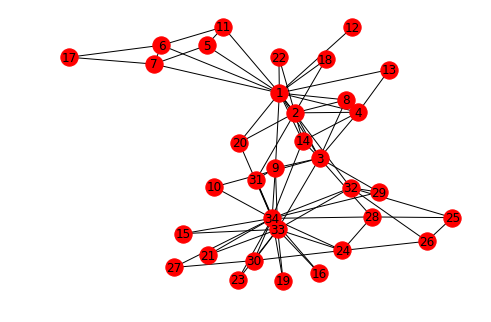

In [7]:
nx.draw(Z, with_labels=True, pos=pos)

In [ ]:
print(nx.info(Z))

In [ ]:
# Let's get the graph size another way
n_V = Z.number_of_nodes()
n_E = Z.number_of_edges()

print(f"Our graph has {n_V} nodes and {n_E} edges.")

### Node data

In [ ]:
# Let's get the nodes
Z.nodes()

In [ ]:
# Let's get any attributes of nodes ...
Z.nodes.data()

In [ ]:
# Great! There is an attribute called club. Let's extract it:
nx.get_node_attributes(Z, 'club')

### Edge data

In [ ]:
# Let's get the edges
Z.edges()

In [ ]:
# Let's get any attributes of edges ...
Z.edges.data()

In [ ]:
# OK. We can see that there are no attributes. 

# Instead, let's ask: Are these edges directed?
Z.is_directed()

Interesting. We see that we have some labels on which club everyone joined (Mr. Hi's or Officer's), but we are using the unweighted version of the graph. As we expect from the paper, it is undirected.

<div class="alert alert-success">
<b> Question: </b> What do the edges represent? When Zachary does provide weights, how does he determine them?

## Local structure
Reference: https://networkx.github.io/documentation/stable/reference/functions.html

We'll use the following commands:

```python
nx.neighbors(G, n)                    # Get a list of neighbors for node n
nx.common_neighbors(G, n1, n2)        # Get common neighbors for nodes n1 and n2
nx.non_neighbors(G, n)                # Get non-neighbors of node n

G.degree(n)                           # Get n's degree
G.degree                              # Get all degrees for all nodes

nx.local_bridges(G, with_span=False)  # Get a list of all edges that form local bridges

nx.number_connected_components(G)     # Get count of connected components
list(nx.connected_components(G))      # Get a list of connected components
```

Let's take a second look at the graph and start exploring. 

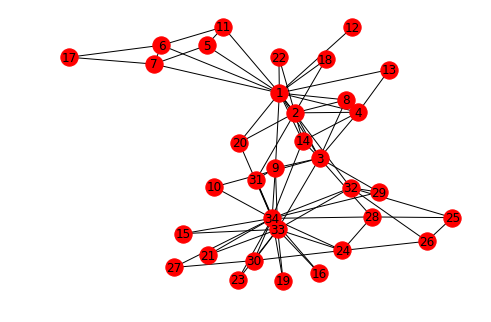

In [8]:
nx.draw(Z, with_labels=True, pos=pos)

### Exploring neighbors

In [ ]:
# Node 17 looks lonely. Let's confirm that (s)he's only friends with 6 and 7
list(nx.neighbors(Z, 17))

In [ ]:
# Node 1 is important - it's Mr. Hi himself. Let's see who his neighbors are:
list(nx.neighbors(Z, 1))

In [ ]:
# Do they share any common neighbors? 
list(nx.common_neighbors(Z,1,17))

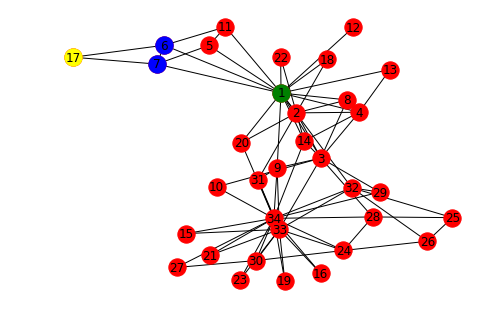

In [9]:
nx.draw(Z, pos=pos, with_labels=True)
nx.draw_networkx_nodes(Z, nodelist = [17],  node_color='yellow', pos=pos)
nx.draw_networkx_nodes(Z, nodelist = [1],   node_color='green', pos=pos)
nx.draw_networkx_nodes(Z, nodelist = list(nx.common_neighbors(Z,1,17)), node_color='blue', pos=pos)
plt.show()

In [ ]:
# Is there anyone that Mr. Hi is not friends with?
sorted(list(nx.non_neighbors(Z, 1)))

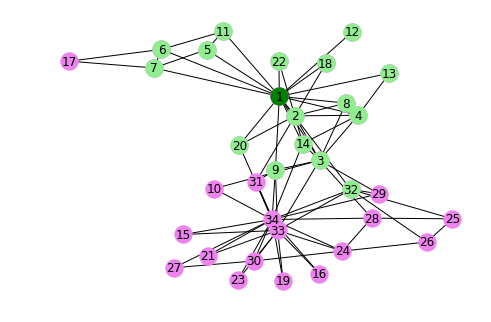

In [10]:
# Let's visualize. Don't worry too much about the code for now
nx.draw(Z, pos=pos, with_labels=True, node_color='violet')
nx.draw_networkx_nodes(Z, nodelist = [1],   node_color='green', pos=pos)
nx.draw_networkx_nodes(Z, nodelist = list(nx.neighbors(Z, 1)), node_color='lightgreen', pos=pos)

plt.show()

### Exploring degree

In [ ]:
# How many neighbors does Mr. Hi have after all? Let's get the degree.
Z.degree(1)

In [ ]:
# Actually, we can get the degree of all nodes:
Z.degree

### Local bridges

In [ ]:
# We can even get a list of local bridges. 
list(nx.local_bridges(Z, with_span=False))

In [ ]:
# Recall that a local bridge consists of two nodes who don't share any neighbors
# Let's check if they fit the definition:
list(nx.common_neighbors(Z,34,20))

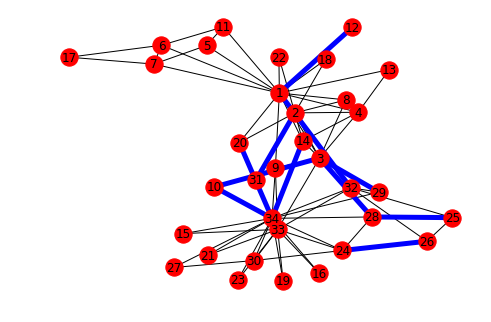

In [11]:
# Let's visualize. Don't worry too much about the code for now
nx.draw(Z, pos=pos, with_labels=True)
nx.draw_networkx_edges(Z, edgelist = list(nx.local_bridges(Z, with_span=False)),   
                        edge_color='blue', width=5, pos=pos)
plt.show()

### Connected components

Reference: https://networkx.github.io/documentation/stable/reference/algorithms/component.html

In [ ]:
# This graph is kind of un-interesting: there is only one component
nx.number_connected_components(Z)

In [ ]:
# But, we saw that Mr. Hi was a very central node. What happens if he quits Karate altogether?

# Let's first copy the graph so we don't overwrite Z
Z_without_hi = Z.copy()

# Now, remove him
Z_without_hi.remove_node(1)

# See how many components are left
nx.number_connected_components(Z_without_hi)

In [ ]:
# And, we can see these components -- e.g. list(nx.connected_components(Z_without_hi))
for i in nx.connected_components(Z_without_hi):
    print(i)

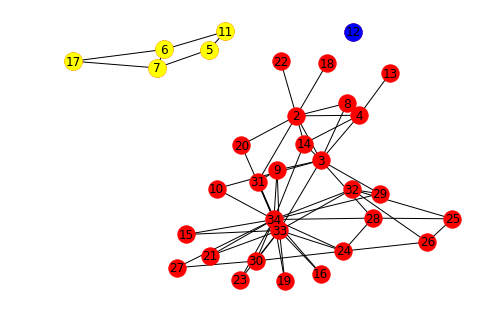

In [14]:
# We can plot to confirm
nx.draw(Z_without_hi, pos=pos, with_labels=True)
nx.draw_networkx_nodes(Z_without_hi, pos=pos, nodelist = list(nx.connected_components(Z_without_hi))[1], node_color='yellow')
nx.draw_networkx_nodes(Z_without_hi, pos=pos, nodelist = list(nx.connected_components(Z_without_hi))[2], node_color='blue')
plt.show()

## Algorithms

We'll use the following commands:

```python
nx.average_shortest_path_length(G)          # Get average length of the shortest path between any two nodes
nx.single_source_shortest_path(G, source)   # Get the shortest paths from a given source node
nx.shortest_path(G, source, sink)           # Get the shortest path between a source and a sink node
 
nx.minimum_cut(G, source, sink, 
               capacity='weight')           # Partition the graph using the minimum cut 
```

### Shortest path

In [ ]:
# Let's get the average shortest path length for this club. We can see that there are only 2.4 degrees of separation!
nx.average_shortest_path_length(Z)

In [ ]:
# We could also get the shortest path to all nodes from a given source, e.g. Mr. Hi
nx.single_source_shortest_path(Z, 1)

In [ ]:
# Finally, we could also get the shortest path for a specific origin and destination. 
# For example how far is Mr. Hi from John?
nx.shortest_path(Z, 1, 34)

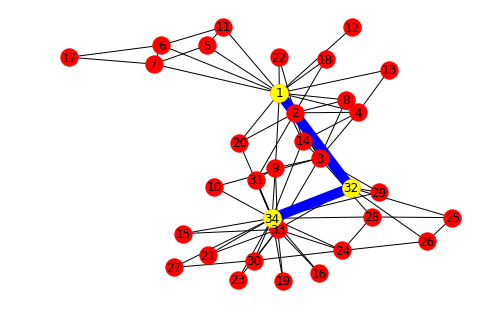

In [15]:
# We can plot to confirm
nx.draw(Z, with_labels=True, pos=pos)
nx.draw_networkx_nodes(Z, nodelist=[1,32,34], with_labels=True, pos=pos, node_color='yellow')
nx.draw_networkx_edges(Z, edgelist=[(1,32), (32,34)], with_labels=True, pos=pos, edge_color='blue', width=10)
plt.show()

<div class="alert alert-success">
<b> Exercise: </b>

- What is the shortest path between John and node 17? 
- If Mr. Hi leaves, what is the shortest path between John and node 17? (don't forget that we already made the graph: Z_without_hi)

**Answer:**
<span style="color:white">
nx.shortest_path(Z, 17,34)
nx.shortest_path(Z_without_hi, 17,34)

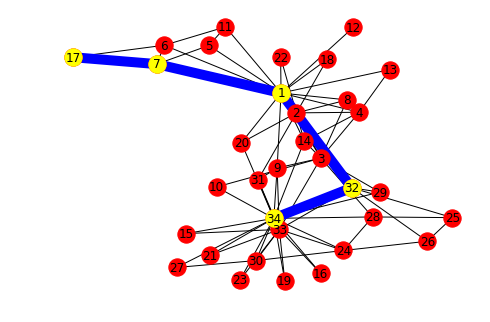

In [16]:
# We can plot to confirm
nx.draw(Z, with_labels=True, pos=pos)
nx.draw_networkx_nodes(Z, nodelist=[1,17,7,32,34], with_labels=True, pos=pos, node_color='yellow')
nx.draw_networkx_edges(Z, edgelist=[(17,7), (7,1), (1,32), (32,34)], with_labels=True, pos=pos, edge_color='blue', width=10)
plt.show()

<div class="alert alert-success">
<b> Exercise: </b>

- If we add a node between nodes 17 and 27, how will the average shortest path in the graph change? (Don't forget to copy the graph first).

**Answer**:
<span style='color:white'>
Z_copy = Z.copy()
Z_copy.add_edge(17,27)
old_average = nx.average_shortest_path_length(Z) 
new_average = nx.average_shortest_path_length(Z_copy)
print(f"The average shortest path decreases from {old_average} to {new_average}.")

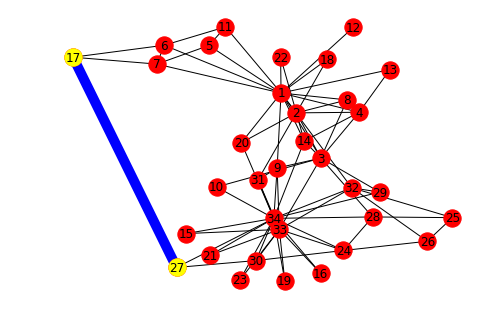

In [17]:
# We can plot to confirm
Z_copy = Z.copy()
Z_copy.add_edge(17,27)
nx.draw(Z_copy, with_labels=True, pos=pos)
nx.draw_networkx_nodes(Z, nodelist=[17,27], with_labels=True, pos=pos, node_color='yellow')
nx.draw_networkx_edges(Z_copy, edgelist=[(17,27)], with_labels=True, pos=pos, edge_color='blue', width=10)
plt.show()

### Max flow / min cut

Zachary uses a simple model of information flow and conflict: 

- Information flows between two poles in the network: Mr. Hi's, and John's.
- Information flows over edges, i.e. interaction between members.
- Information flow increases with the strength of these edges, i.e. the number of interactions.
- Bottlenecks in information flow represent weak parts of the network. 
- These bottlenecks can be used to predict how the network will split in the face of conflict.

His two main hypotheses are:
<div class = "alert-info">
    <br>
<b>H1</b>: "[There exists] some structural feature in the network inhibiting information flow between factions." 

<b>H2</b>: "A bottleneck in the network, representing a structural limitation on information flow from the source to the sink, will predict the break that occurred in the club at the time of the fission." 

<br>
</div>


Computationally, he identifies bottlenecks using the maximum-flow minimum-cut labeling procedure of Ford and Fulkerson. In short, 
- In a network, we can find the **maximum flow** that can be sustained between a source and a sink node.   
   - It is determined by the graph structure and the capacity of the edges in the graph.
- This is equivalent in cost to the **minimum cut** needed to partition the graph into two components (one with the source, the other with the sink).   
    - It is defined as the minimum total weight of edges that can be removed from the graph to partition it.
- Ford and Fulkerson provide an algorithm for identifying these edges. 
    - If we switch the source and the sink, repeat the min-cut procedure, and still get the same answer, then our cut is unique.
    
> Per Zachary, "intuitively stated, they proved that the maximum flow is equal to the capacity of the smallest possible break in the network separating the source from the sink." 

<div class="alert alert-warning">
Brief detour: In order to apply the max flow / min cut algorithm to replicate Zachary, we need edge weights. The code below imports and assigns them to our graph. We'll go over importing data from outside sources in the next section. For now,  let's take it on faith that we can read in a weighted edgelist from CSV...

In [ ]:
# Import edge weights...
C = pd.read_csv("data/zachary_edge_weights.csv")

# ... and add the edges to our graph
for edge in np.array(C):
    u,v,w= edge
    Z[u][v]['weight'] = w

# Make sure it worked
Z.edges.data()

#### Find the minimum cut

In [ ]:
source = 1   # Mr. Hi
sink   = 34  # John A 

# Let's apply the algorithm to make the minimum cut on the graph
cut_value, partition = nx.minimum_cut(Z, source, sink, capacity='weight')

In [ ]:
# We can inspect the remaining partition of the graph:
partition

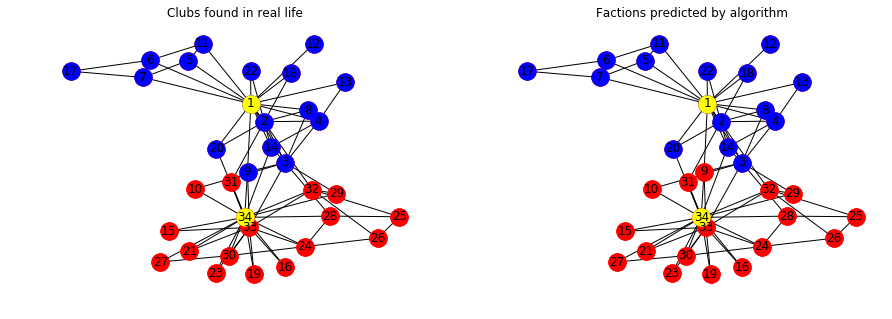

In [22]:
fig, ax = plt.subplots(1,2,figsize=[15,5])

nx.draw(Z, pos=pos, with_labels=True, ax=ax[1])
nx.draw_networkx_nodes(Z,pos=pos, nodelist =list(partition[0]), node_color='blue', ax=ax[1])
nx.draw_networkx_nodes(Z,pos=pos, nodelist =list(partition[1]), node_color='red', ax=ax[1])
nx.draw_networkx_nodes(Z,pos=pos, nodelist =[1,34], node_color='yellow', ax=ax[1])
ax[1].set_title("Factions predicted by algorithm")

# Now, let's reconstruct and plot the original
mr_hi   = [node for node,data in Z.nodes(data=True) if data['club']=='Mr. Hi']
officer = [node for node,data in Z.nodes(data=True) if data['club']=='Officer']

nx.draw(Z, pos=pos, with_labels=True, ax=ax[0])
nx.draw_networkx_nodes(Z,pos=pos, nodelist =mr_hi, node_color='blue', ax=ax[0])
nx.draw_networkx_nodes(Z,pos=pos, nodelist =officer, node_color='red', ax=ax[0])
nx.draw_networkx_nodes(Z,pos=pos, nodelist =[1,34], node_color='yellow', ax=ax[0])
ax[0].set_title("Clubs found in real life")

plt.show()

We can see that we have replicated Zachary's findings: we have one misprediction, node 9. 
<img src="figures/zachary_table3.PNG" style="width: 600px;"/>

# Exporting NetworkX graphs to other data structures

Let's revisit the graph representations from above. Now that we have this nice Karate club graph, we can convert it back into the canonical representations and replicate the adjacency matrix from the paper. We'll use the following commands:

```python
nx.to_edgelist(Z)            # Convert to edge list
nx.to_dict_of_lists(Z)       # Convert to a dictionary of lists
nx.to_pandas_adjacency(Z)    # Convert to an adjacency matrix in pandas
nx.to_numpy_matrix(Z)        # Convert to an adjacency matrix in numpy
```

## As edgelist

In [ ]:
# The simplest representation is a basic edgelist
list(nx.to_edgelist(Z))

## As dictionary

In [ ]:
# We can also convert to a dictionary of lists
nx.to_dict_of_lists(Z)

## As adjacency matrix

In [ ]:
# To adjacency matrix (the add-ons are to make the print output match the paper)
nx.to_pandas_adjacency(Z)  .astype(int).sort_index().sort_index(axis=1)

<img src="figures/zachary_fig3.PNG" style="width: 700px;"/>

# Wrap-up

## Plots

Let's end with a simple plot to replicate the classic diagram from Zachary:
<img src="figures/zachary_fig1.PNG" style="width: 500px;"/>

We will cover graphing in the next notebook, but just for fun...

In [ ]:
# Let's tell networkX we want a circular layout
pos = nx.circular_layout(Z)

# We need to jump through some hoops to rotate the graph
new_pos = {}
for k,v in pos.items():
    new_pos[ (k+8)%34 +1 ] = v
    
# And there we go!
nx.draw(Z, pos=new_pos, with_labels=True)

## Conclusion

We have used the Zachary (1977) Karate club data to practice some simple network analysis. We have learned about graph representations, how to read data into `networkX` graphs, and some basic analytic steps like finding connected components and calculating shortest paths. Next, we'll dig into visualizing graphs using a more complex network as an example.

Further reading and tutorials:
- http://datenstrom.gitlab.io/cs532-s17/notebooks/karate_club.html
- https://petterhol.me/2018/01/28/zacharys-zachary-karate-club/
- http://studentwork.prattsi.org/infovis/labs/zacharys-karate-club/

If you **really** enjoyed yourself today, you should aspire to join the [Zachary Karate Club Club](http://networkkarate.tumblr.com/)!